# Assignment 1
Philip O' Connor <br>
21249304

## Part 1
Logistic regression is a variation on multivariable linear regression where the output is reduced to a 1 or 0 using a sigmoid function.  [1]
Input values are multiplied by a weight term and the output is discretised using a logistic funciton, like sigmoid or tanh. Stochastic gradient descent uses one observaton at a time to update the weights of w and b until either the cost function J is below a predefined threshold or it has reached the max number of iterations.

[Fundamentals of Machine Learning for Predictive Data Analytics]

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pdb

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score

In [2]:
def predictNscore(model, X, y):
    y_hat = model.predict(X)
    f1 = f1_score(y, y_hat)
    prec = precision_score(y, y_hat)
    rec = recall_score(y, y_hat)
    print(f"F1 score: {np.round(f1,2)}\nPrecision:{np.round(prec,2)}\nRecall: {np.round(rec,2)}")
    return y_hat

class sgd_log_reg():
        
    def fit(self, X, y, alpha, n_iter, tresh, seed):
        # Set seed for the random numers
        np.random.seed(seed)
        # Initialise w with random numbers, one for each column in training dataset
        self.w = np.array(np.random.rand(len(X.columns)))
        self.b = np.random.rand()
        # Store cost in a list, first value is very high. Will use -1 indexing to check against threshold value
        cost_list = [1000]
        for n in range(n_iter+1):
            # SGD - iterate through each observation, one at a time
            for i in range(len(X)):
                # Take a single observation
                xi = X.iloc[i]
                yi = y.iloc[i]

                # Calculate y_hat
                z = np.dot(self.w, xi)+self.b 
                y_hat = 1/(1+np.exp(-z))
                # Calcualte cost funciton 
                cost = -(yi*np.log(y_hat))+((1-yi)*np.log(1-y_hat))

                # While previous cost is higher than threshold
                if cost_list[-1]-cost > tresh:
                    cost_list.append(cost)
                    # Calculate gradients of w and b
                    for weight in self.w:
                        del_w = (y_hat-yi)*xi
                        del_b = y_hat-yi
                    # Update w and b
                    for weight in self.w:
                        self.w = self.w - alpha*del_w
                        self.b = self.b - alpha*del_b

                # If cost is below the threshold then break out of the loop
                elif  cost_list[-1]-cost <= tresh:
                    break
        # If the funciton runs for all n iterations then it has not converged. Print out the warning so user can update hyperparameters.
        if n == n_iter:
            print(f"{n} of {n_iter} iterations ran. Convergence has not happened. Cost is {cost}")
        if n < n_iter:
            print(f"{n} of {n_iter} iterations ran. Convergence has happened. Cost is {cost}")
            
    def predict(self, X):
        z = np.dot(X, self.w)+self.b
        y_hat_test = 1/(1+np.exp(-z))

        # Discretise the output into 1s and 0s
        y_hat_rounded = np.round(y_hat_test,0)
        y_hat_int = [int(i) for i in y_hat_rounded]
        return y_hat_int



## Part 2

In [3]:
# Blobs
df = pd.read_csv("blobs400.csv")
# train/test split~
X_full_train, X_test, y_full_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.15, random_state=42)
# train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_full_train,y_full_train , test_size=0.15, random_state=42)

# train on training dataset
blobs_model = sgd_log_reg()
blobs_model.fit(X_train, y_train, alpha=0.1, n_iter=10000, tresh=10**-6, seed=42)

val_preds = predictNscore(blobs_model, X_val,y_val)

10000 of 10000 iterations ran. Convergence has not happened. Cost is 0.4384361128147499
F1 score: 0.5
Precision:0.67
Recall: 0.4


In [4]:
test_preds = predictNscore(blobs_model, X_test,y_test)

F1 score: 0.38
Precision:0.47
Recall: 0.32


<AxesSubplot:xlabel='X3', ylabel='X3'>

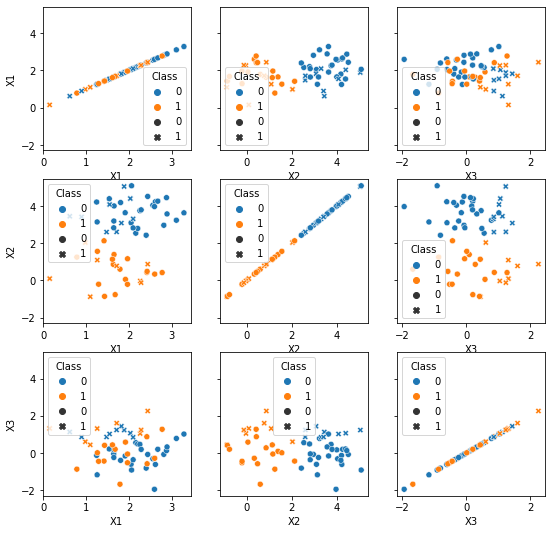

In [5]:
fig, axs = plt.subplots(ncols=3, nrows=3, sharey=True, figsize=(9,9))
sns.scatterplot(x=X_test['X1'], y=X_test['X1'], ax=axs[0,0], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X2'], y=X_test['X1'], ax=axs[0,1], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X3'], y=X_test['X1'], ax=axs[0,2], hue =y_test,  style=test_preds)

sns.scatterplot(x=X_test['X1'], y=X_test['X2'], ax=axs[1,0], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X2'], y=X_test['X2'], ax=axs[1,1], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X3'], y=X_test['X2'], ax=axs[1,2], hue =y_test,  style=test_preds)

sns.scatterplot(x=X_test['X1'], y=X_test['X3'], ax=axs[2,0], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X2'], y=X_test['X3'], ax=axs[2,1], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X3'], y=X_test['X3'], ax=axs[2,2], hue =y_test,  style=test_preds)

In [6]:
df = pd.read_csv("moons500.csv")

# train/test split
X_full_train, X_test, y_full_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=42)
# train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_full_train,y_full_train , test_size=0.2, random_state=42)

# Fit model to data
moons_model = sgd_log_reg()
moons_model.fit(X_train, y_train, alpha=0.1, n_iter=1000, tresh=10**-6, seed=1)
# calculate predictions from the model. Skipping validation as the assignment is coding a logistic regression.

val_preds = predictNscore(moons_model,X_val,y_val )

1000 of 1000 iterations ran. Convergence has not happened. Cost is 0.5674456483493309
F1 score: 0.54
Precision:0.43
Recall: 0.72


In [7]:
test_preds = predictNscore(moons_model,X_test,y_test )

F1 score: 0.58
Precision:0.5
Recall: 0.7


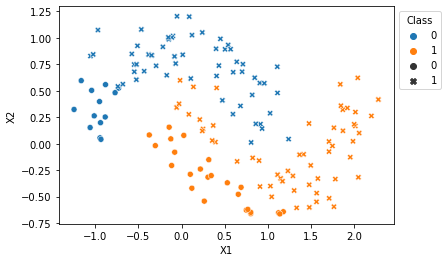

In [8]:
ax = sns.scatterplot(data = X_test, x='X1', y='X2', hue =y_test,  style=test_preds, legend='brief')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Part 3 - Shallow neutal network



In [9]:
def logistic_fn(z):
    return 1/(1+np.exp(-z))

def logistic_derivation(z):
    return logistic_fn(z)*(1-logistic_fn(z))

class shallow_net():
    
    def network_layout(self, n_input, n_nodes, n_output, seed):
        # Build and initialise the network weights and biases with random values between 0 and 1 
        np.random.seed(seed)
        self.n_nodes = n_nodes
        self.hidden_layer_weights = np.random.rand(n_nodes,n_input)-0.5
        self.hidden_layer_bias = np.random.rand(n_nodes)
        self.output_layer_weights = np.random.rand(n_nodes)
        self.output_layer_bias = np.random.rand()
    
    def print_network(self):
        # Print out the current weights and biases of the network
        print("Hidden Weights:\n")
        print(self.hidden_layer_weights)
        print("\nHidden Bias:\n")
        print(self.hidden_layer_bias)
        print("Output Weights:\n")
        print(self.output_layer_weights)
        print("\nOutput Bias:\n")
        print(self.output_layer_bias)
    
    def return_network(self):
        # Return values of the network
        return self.hidden_layer_weights, self.hidden_layer_bias, self.output_layer_weights, self.output_layer_bias

 

    def fit(self, X, y, alpha, n_iter, thresh):
        # For each iteration
        
        j2=100
        
        self.j_list = []
        for n in range(n_iter+1):
            # Check if threshold is met
            if j2 <= thresh:
                continue
            else:
                pass
            
            # Print a progress update
            if n%(n_iter/5)==0:
                print(f"{n}/{n_iter} complete")
            else:
                pass


            # SGD - iterate through each observation, one at a time
            for i in range(len(X_train)):
                # Take a single observation
                xi = X_train.iloc[i]
                yi = y_train.iloc[i]
                # Create some lists to store values in.
                hidden_layer_cost=[]
                a1=np.array([])
                j1 = []
                z1_list=[]
                del_z_hidden_list=[]


                # For each node in hidden layer calculate z, activation and the cost                
                
                # Calculate y_hat
                z1 = np.dot(self.hidden_layer_weights, xi.T)+self.hidden_layer_bias 
                a1 = logistic_fn(z1)

                # Calcualte cost funciton - not used but no harm in tracking
                hidden_layer_cost.append(-(yi*np.log(a1))+((1-yi)*np.log(1-a1)))
                    
                # In the output layer calculate z, activation and the cost
                z2 = np.dot(a1,self.output_layer_weights) +self.output_layer_bias
                a2 = logistic_fn(z2)
                # Calcualte cost funciton 
                j2 = -(yi*np.log(a2))+((1-yi)*np.log(1-a2))
                



                # Back propogation
                # Output node
                del_z_output = a2-yi 
                del_w_output = np.dot(del_z_output,a1.T)
                del_b_output = del_z_output
                

                # Hidden Layer
                # For each node in the hidden layer, calc the del_z wrt its output node weight and store in a list

                del_z_hidden = logistic_derivation(z1)*np.dot(self.output_layer_weights,del_z_output)
                #del_z_hidden_list.append(del_z_hidden)
                # Reshape the vectors to return a matrix that can be used to update the hidden weights.
                del_w_hidden = np.array(del_z_hidden.reshape((self.n_nodes,1)))*np.array(xi)
                del_b_hidden = del_z_hidden
                #pdb.set_trace()
                
                """
                del_z_hidden = logistic_derivation(z1)*np.dot(self.output_layer_weights.T,del_z_output)
                #del_z_hidden_list.append(del_z_hidden)
                # Reshape the vectors to return a 2x2 matrix that can be used to update the hidden weights.
                del_w_hidden = np.array(del_z_hidden.reshape((self.n_nodes,1)))*np.array(xi).T
                del_b_hidden = del_z_hidden"""
                
                    
                # Update the hidden layer weights with the matrix calculated above
                self.hidden_layer_weights = self.hidden_layer_weights - (alpha*del_w_hidden)
                # Update bidden layer bias
                self.hidden_layer_bias = self.hidden_layer_bias - (alpha * del_b_hidden)
                    
                self.output_layer_weights = self.output_layer_weights - (alpha*del_w_output)
                self.output_layer_bias = self.output_layer_bias - (alpha*del_b_output)
                #pdb.set_trace()
            self.j_list.append(j2)
            # Creating attributes to query them 
        self.a1 = a1
        self.a2 = a2
        self.del_z_output = del_z_output
        self.del_w_output = del_w_output
        self.del_b_output = del_b_output 

        # Hidden Layer
        self.del_z_hidden = del_z_hidden
        self.del_w_hidden = del_w_hidden
        self.del_b_hidden = del_b_hidden


        print(f"{n} iterations ran")


    def predict(self, X):
        predictions=[]
        for i in range(len(X)):
            # Take a single observation
            xi = X.iloc[i]
            a1_pred = []

            z1 = np.dot(self.hidden_layer_weights, xi)+self.hidden_layer_bias
            a1_pred = logistic_fn(z1)

            
            z2 = np.dot(a1_pred,self.output_layer_weights) +self.output_layer_bias
            a2 = logistic_fn(z2)
            predictions.append(a2)
            #pdb.set_trace()
        return [int(i) for i in np.round(predictions,0)]
    



            
            

            

                
                



In [10]:
# Blobs
df = pd.read_csv("blobs400.csv")
# train/test split~
X_full_train, X_test, y_full_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.15, random_state=42)
# train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_full_train,y_full_train , test_size=0.15, random_state=42)

blobs_nn = shallow_net()

blobs_nn.network_layout(len(X_train.columns), len(X_train.columns),1, seed=45)

blobs_nn.fit(X_train, y_train, alpha=0.2, n_iter=100, thresh = 1e-6)

0/100 complete
20/100 complete
40/100 complete
60/100 complete
80/100 complete
100/100 complete
100 iterations ran


In [11]:
y_hat_val = predictNscore(blobs_nn, X_val, y_val)

F1 score: 0.96
Precision:1.0
Recall: 0.92


In [12]:
y_hat_test =predictNscore(blobs_nn, X_test, y_test)

F1 score: 0.96
Precision:1.0
Recall: 0.92


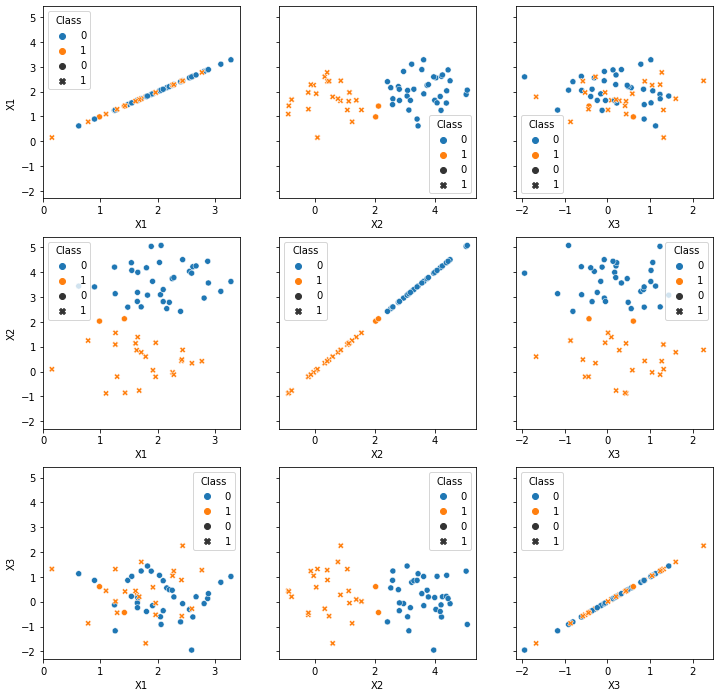

In [13]:
fig, axs = plt.subplots(ncols=3, nrows=3, sharey=True, figsize=(12,12))
sns.scatterplot(x=X_test['X1'], y=X_test['X1'], ax=axs[0,0], hue =y_test,  style=y_hat_test)
sns.scatterplot(x=X_test['X2'], y=X_test['X1'], ax=axs[0,1], hue =y_test,  style=y_hat_test)
sns.scatterplot(x=X_test['X3'], y=X_test['X1'], ax=axs[0,2], hue =y_test,  style=y_hat_test)

sns.scatterplot(x=X_test['X1'], y=X_test['X2'], ax=axs[1,0], hue =y_test,  style=y_hat_test)
sns.scatterplot(x=X_test['X2'], y=X_test['X2'], ax=axs[1,1], hue =y_test,  style=y_hat_test)
sns.scatterplot(x=X_test['X3'], y=X_test['X2'], ax=axs[1,2], hue =y_test,  style=y_hat_test)

sns.scatterplot(x=X_test['X1'], y=X_test['X3'], ax=axs[2,0], hue =y_test,  style=y_hat_test)
sns.scatterplot(x=X_test['X2'], y=X_test['X3'], ax=axs[2,1], hue =y_test,  style=y_hat_test)
sns.scatterplot(x=X_test['X3'], y=X_test['X3'], ax=axs[2,2], hue =y_test,  style=y_hat_test)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

[Text(0.5, 1.0, 'Log loss per Epoch'),
 Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'Log Loss')]

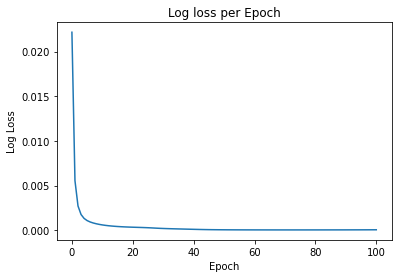

In [14]:
ax = sns.lineplot(data=blobs_nn.j_list)
ax.set(title='Log loss per Epoch', xlabel='Epoch', ylabel='Log Loss')

In [104]:
# Blobs
df = pd.read_csv("moons500.csv")
# train/test split~
X_full_train, X_test, y_full_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.15, random_state=42)
# train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_full_train,y_full_train , test_size=0.15, random_state=42)

moons_nn = shallow_net()

moons_nn.network_layout(len(X_train.columns), len(X_train.columns),1, seed=80)

moons_nn.fit(X_train, y_train, alpha=0.01, n_iter=100, thresh = 1e-6)

0/100 complete
20/100 complete
40/100 complete
60/100 complete
80/100 complete
100/100 complete
100 iterations ran


In [16]:
y_hat_val = predictNscore(moons_nn, X_val, y_val)

F1 score: 0.96
Precision:1.0
Recall: 0.92


In [17]:
y_hat_test = predictNscore(moons_nn, X_test, y_test)

F1 score: 0.82
Precision:0.88
Recall: 0.77


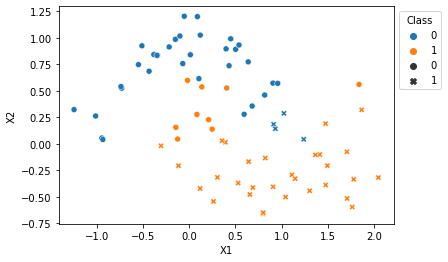

In [18]:
ax = sns.scatterplot(data = X_test, x='X1', y='X2', hue =y_test,  style=y_hat_test, legend='brief')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

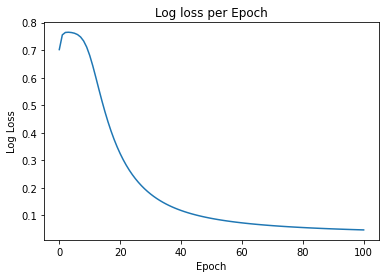

In [19]:
ax = sns.lineplot(data=moons_nn.j_list)
ax.set(title='Log loss per Epoch', xlabel='Epoch', ylabel='Log Loss');

# Comments

The shallow neural net has performed much better on both datasets on F1, precision and recall. The decision boundaries in the plots are also far more appropriate. In the blobs dataset, there is clear separation of the two classes even when not linearly seperable. 

# Part 4 - Fashion MNIST

The categories assigned to me are tshirt/top and ankle boot. <br>
The index positions of these in the lables provided are 0 and 9 respectively

In [108]:
# This function taken directly from the Fashion-MNIST github site: 
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

# Note: first arg is the path name, second is the file prefix, either 'train' or 't10k' (which is 10k of test data)
def load_mnist(path, kind='train'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.


In [109]:
(train_imgs, train_labels) = load_mnist("fashion-mnist/data/fashion/")

label_names = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
full_df =pd.DataFrame(train_imgs) 
full_df['labels'] = train_labels
df = full_df[full_df['labels']==0]
df = df.append(full_df[full_df['labels']==9])

In [110]:
# RE-encoding the lables for the logistic regressor
# tshirt/top = 0
# Ankle boot = 1
df.loc[df.labels == 9 ,'labels']=1

In [111]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.30, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)


In [112]:
n_inputs = len(X_train.columns)

In [113]:
fashion_nn = shallow_net()

fashion_nn.network_layout(n_inputs, 40,1, seed=80)

fashion_nn.fit(X_train, y_train, alpha=0.01, n_iter=1000, thresh = 1e-6)

0/1000 complete


/tmp/ipykernel_6480/273668406.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
/tmp/ipykernel_6480/4279677798.py:75: RuntimeWarning: divide by zero encountered in log
  hidden_layer_cost.append(-(yi*np.log(a1))+((1-yi)*np.log(1-a1)))
/tmp/ipykernel_6480/4279677798.py:75: RuntimeWarning: invalid value encountered in multiply
  hidden_layer_cost.append(-(yi*np.log(a1))+((1-yi)*np.log(1-a1)))


1000 iterations ran


In [114]:
y_hat_val = predictNscore(fashion_nn, X_val, y_val)

/tmp/ipykernel_6480/273668406.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


F1 score: 0.99
Precision:0.99
Recall: 0.99


In [115]:
y_hat_test = predictNscore(fashion_nn, X_test, y_test)

/tmp/ipykernel_6480/273668406.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


F1 score: 0.99
Precision:0.99
Recall: 0.99


In [116]:
print('   y','y^')
[i for i in zip(y_test[:10], test_preds[:10])]

   y y^


[(0, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 1)]

# Part 5

There's something wrong with how im handling my matrices, I'm losing the output weights and bias

In [136]:
def logistic_fn(z):
    return 1/(1+np.exp(-z))

def logistic_derivation(z):
    return logistic_fn(z)*(1-logistic_fn(z))

class deep_net():
    def __init__(self):
        self.weights=[]
        self.bias=[]
        
    
    def network_layout(self, arch, seed):
        # Build and initialise the network weights and biases with random values between 0 and 1 
        np.random.seed(seed)
        self.n_layers= len(arch)
        for i in range(len(arch)):
            if i>=1:
                self.weights.append(np.random.rand(arch[i], arch[i-1])-0.5)
                self.bias.append(np.random.rand(arch[i])-0.5)

    
    def print_network(self):
        # Print out the current weights and biases of the network
        for i in range(len(self.weights)):
            print(f"Layer {i+1} of {len(self.weights)}")
            print(f"{self.weights[i]}")
    
    def return_network(self):
        # Return values of the network
        return self.weights, self.bias

    def fit(self, X, y, alpha, n_iter, thresh):
        jx=100
        self.j_list=[]
        for n in range(n_iter+1):
            # Check if threshold is met
            '''if jx <= thresh:
                break
            else:
                pass'''
            # Print a progress update
            if n%(n_iter/5)==0:
                print(f"{n}/{n_iter} complete")
            else:
                pass


            # SGD - iterate through each observation, one at a time
            for i in range(len(X)):
                # Take a single observation
                xi = X.iloc[i]
                yi = y.iloc[i]
                zx_list=[]
                ax_list=[]
                # Create some lists to store values in.

                # For each node in hidden layer calculate z, activation and the cost                
                #pdb.set_trace()
                for w in range(len(self.weights)):
                    if w==0:
                        zx = np.dot(self.weights[w], xi.T)+self.bias[w]
                        ax = logistic_fn(zx)
                        zx_list.append(zx)
                        ax_list.append(ax)

                    else:
                        zx = np.dot(self.weights[w], zx.T)+self.bias[w]
                        ax = logistic_fn(zx)
                        zx_list.append(zx)
                        ax_list.append(ax)     
                #pdb.set_trace()

                jx = -(yi*np.log(ax[0])+(1-yi)*np.log(1-ax[0]))

                dw_list=[]
                db_list=[]
                dz_list=[]

                # Back propogation
                # Output node
                #pdb.set_trace()
                for w in range(len(self.weights)-1,-1,-1):
                    
                    if w==len(self.weights)-1:
                        dz = ax-yi
                        dw = dz*ax_list[w-1]
                        db=dz
                        dw_list.append(dw)
                        dz_list.append(dz)
                        db_list.append(db)
                        
                                     
                    elif w>0:
                        dz = logistic_derivation(zx_list[w])*np.sum(self.weights[w+1]*dz)
                        dw = np.array(dz.reshape((len(zx_list[w]),1)))*np.array(ax_list[w-1])
                        db = dz
                        dw_list.append(dw)
                        dz_list.append(dz)
                        db_list.append(db)
                    
                    else:
                        dz = logistic_derivation(zx_list[w])*np.sum(self.weights[w+1]*dz)
                        dw = np.array(dz.reshape((len(zx_list[w]),1)))*np.array(xi)
                        db = dz
                        dw_list.append(dw)
                        dz_list.append(dz)
                        db_list.append(db)
                    
                        
               


                # Pre dw_list reverse
                #pdb.set_trace()
                dw_list = dw_list[::-1]
                db_list = db_list[::-1]
                # Pst dw_list reverse
                #pdb.set_trace()
                # Store t0 weights and biases before updating to t1 ws and bs
                wt0 = self.weights.copy()
                bt0 = self.bias.copy()
                
                

                # Update the hidden layer weights with the matrix calculated above
                for w in range(len(self.weights)):
                    #db.set_trace()
                    self.weights[w] = self.weights[w] - np.dot(alpha,dw_list[w])
                    self.bias[w] = self.bias[w] - np.dot(alpha,db_list[w])
            #pdb.set_trace()
        self.j_list.append(jx)
        
        # Creating attributes to query them 
        self.ax_list = ax_list
        self.db_list = db_list
        self.dw_list = dw_list
        #pdb.set_trace()

        print(f"{n} iterations ran")


    def predict(self, X):
        predictions=[]
        for n in range(len(X)):
            xi=X.iloc[n]
            #pdb.set_trace()
            # Take a single observation
            for w in range(len(self.weights)):
                if w==0:
                    #pdb.set_trace()
                    zx = np.dot(self.weights[w], xi.T)+self.bias[w]
                    ax = logistic_fn(zx)

                else:
                    zx = np.dot(self.weights[w], zx.T)+self.bias[w]
                    ax = logistic_fn(zx)
       
            #pdb.set_trace()
            predictions.append(ax)
 
            #pdb.set_trace()
        return [int(i) for i in np.round(predictions,0)]

In [137]:
test = deep_net()

test.network_layout([len(X_train.columns),10, 1], 20)

test.fit(X_train, y_train, alpha=0.01, n_iter=100, thresh = 1e-9)

0/100 complete


/tmp/ipykernel_6480/623189905.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
/tmp/ipykernel_6480/623189905.py:74: RuntimeWarning: divide by zero encountered in log
  jx = -(yi*np.log(ax[0])+(1-yi)*np.log(1-ax[0]))
/tmp/ipykernel_6480/623189905.py:74: RuntimeWarning: invalid value encountered in multiply
  jx = -(yi*np.log(ax[0])+(1-yi)*np.log(1-ax[0]))


20/100 complete
40/100 complete
60/100 complete
80/100 complete
100/100 complete
100 iterations ran


In [138]:
y_hat_val = predictNscore(test, X_val, y_val)

/tmp/ipykernel_6480/623189905.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


F1 score: 0.99
Precision:0.99
Recall: 0.98


In [142]:
y_hat_test = predictNscore(test, X_test, y_test)

/tmp/ipykernel_6480/623189905.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


F1 score: 0.99
Precision:0.98
Recall: 0.99
